In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from tqdm import trange
import warnings
warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv('driver.csv')

In [14]:
df.count()

id                      54681
city_name               54681
signup_os               47824
signup_channel          54681
signup_date             54681
bgc_date                32896
vehicle_added_date      13134
vehicle_make            13223
vehicle_model           13223
vehicle_year            13223
first_completed_date     6137
dtype: int64

In [230]:
X=df.iloc[:,:-1]

In [199]:
i=pd.get_dummies(df.vehicle_model,drop_first=True)
i=i.rename(columns={'Bicycle':'bicycle','Land Rover':'land rover'})
X=X.join(i)

In [202]:
i=pd.get_dummies(df.vehicle_make)
X=X.join(i)

In [203]:
i=pd.get_dummies(df.city_name,drop_first=True)
X=X.join(i)
i=pd.get_dummies(df.signup_os,drop_first=True)
X=X.join(i)
i=pd.get_dummies(df.signup_channel,drop_first=True)
X=X.join(i)

In [17]:
sign=[]
bgc=[]
for i in range(750):
    if X[['signup_date','bgc_date']].notna().iloc[i,-1] == True:
        bgc.append(np.datetime64(parser.parse(X.bgc_date[i]).date()))
        sign.append(np.datetime64(parser.parse(X.signup_date[i]).date()))

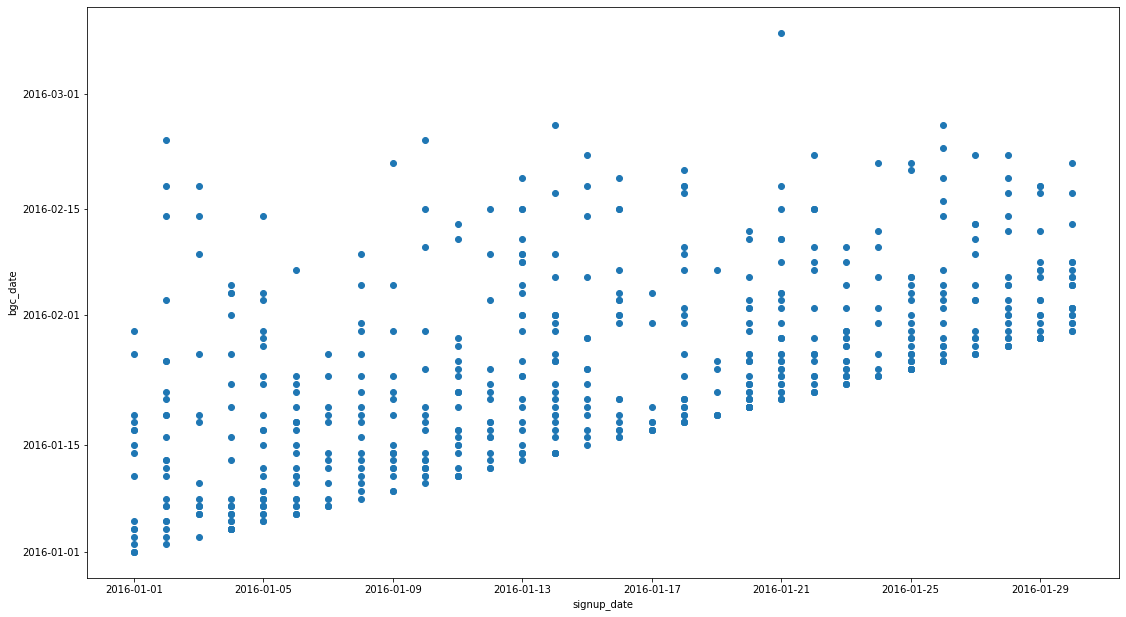

In [18]:
plt.scatter(sign,bgc)
plt.xlabel('signup_date')
plt.ylabel('bgc_date')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('sign_bgc.pdf')

AttributeError: 'Series' object has no attribute 'to_datetime'

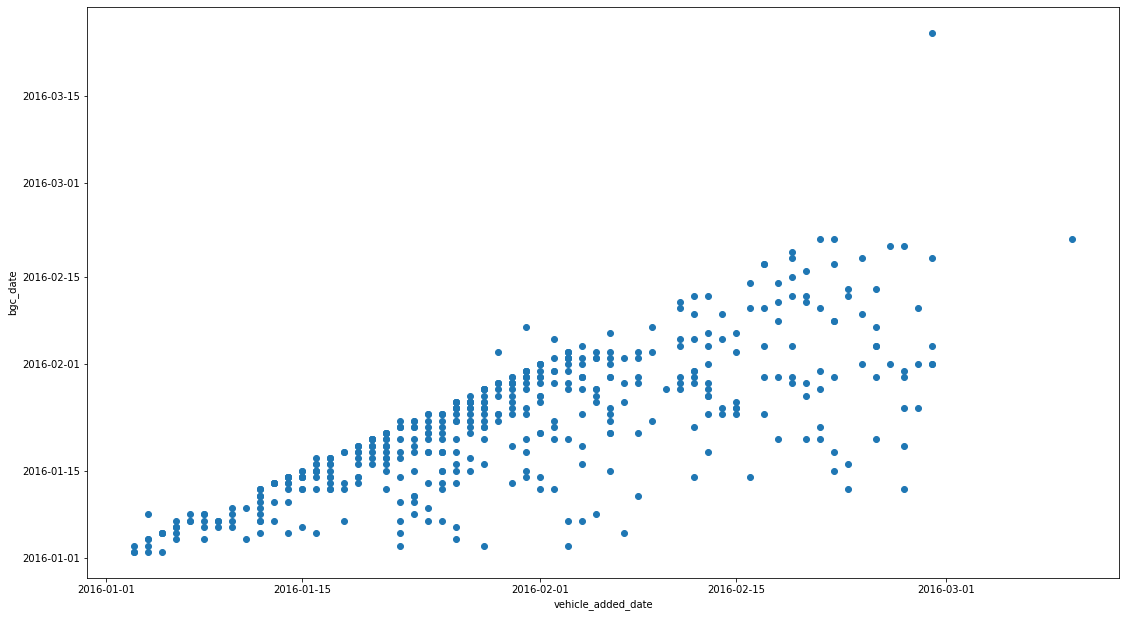

In [22]:
add=[]
bgc=[]
for i in range(1500):
    if X[['vehicle_added_date','bgc_date']].notna().iloc[i,0] == True and X[['vehicle_added_date','bgc_date']].notna().iloc[i,1] == True :
        bgc.append(np.datetime64(parser.parse(X.bgc_date[i]).date()))
        add.append(np.datetime64(parser.parse(X.vehicle_added_date[i]).date()))
plt.scatter(add,bgc)
plt.xlabel('vehicle_added_date')
plt.ylabel('bgc_date')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('bgc_vehicle_added.pdf')

In [20]:
count=0
for i in range(len(X)):
    if X[['vehicle_added_date','bgc_date']].notna().iloc[i,0] == True and X[['vehicle_added_date','bgc_date']].notna().iloc[i,1] == True :
        days=np.datetime64(parser.parse(X.bgc_date[i]).date())-np.datetime64(parser.parse(X.vehicle_added_date[i]).date())
        days=days.astype(int)
        if days>0:
            count+=1

In [21]:
print(count)

220


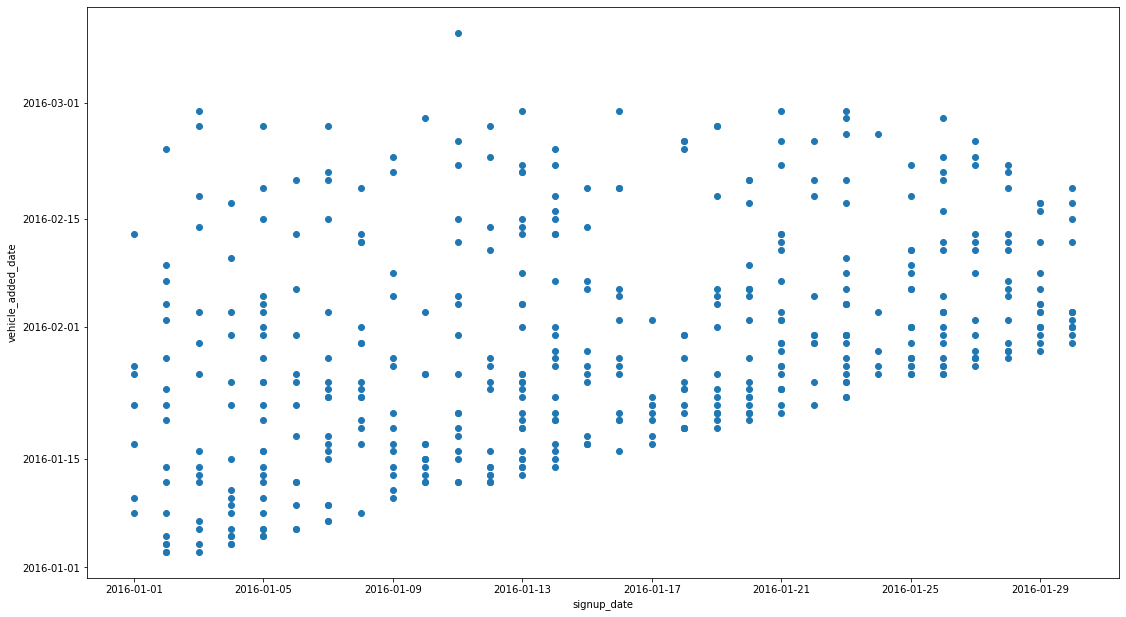

In [21]:
sign=[]
add=[]
for i in range(1500):
    if X[['vehicle_added_date','signup_date']].notna().iloc[i,0] == True  :
        add.append(np.datetime64(parser.parse(X.vehicle_added_date[i]).date()))
        sign.append(np.datetime64(parser.parse(X.signup_date[i]).date()))
plt.scatter(sign,add)
plt.xlabel('signup_date')
plt.ylabel('vehicle_added_date')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('sign_vehicle_added.pdf')

In [9]:
cross=pd.DataFrame(df.first_completed_date.notna(),)

In [11]:
cross=cross.join(df.vehicle_model.notna())

In [12]:
cross=cross.join(df.vehicle_make.notna())

In [13]:
cross=cross.join(df.vehicle_added_date.notna())

In [16]:
cross=cross.join(df.vehicle_year.notna())

In [17]:
pd.crosstab(cross['vehicle_added_date'],cross['vehicle_year'])

vehicle_year,False,True
vehicle_added_date,,
False,41458,89
True,0,13134


In [15]:
pd.crosstab(cross['vehicle_added_date'],cross['vehicle_model'])

vehicle_model,False,True
vehicle_added_date,,
False,41458,89
True,0,13134


In [204]:
X2=X

In [205]:
X2=X2.loc[X2.vehicle_added_date.dropna().index]

In [206]:
X3=X2.loc[X2.bgc_date.dropna().index]

In [207]:
X4=X3.loc[X3.city_name.dropna().index]

'Toyota'

In [208]:
for i in X4.index:
        days=np.datetime64(parser.parse(X4.bgc_date[i]).date())-np.datetime64(parser.parse(X4.signup_date[i]).date())
        days=days.astype(int)
        X4.loc[i,'bgc-signup']=days

In [209]:
for i in X4.index:
        days=np.datetime64(parser.parse(X4.vehicle_added_date[i]).date())-np.datetime64(parser.parse(X4.bgc_date[i]).date())
        days=days.astype(int)
        X4.loc[i,'vehicle-bgc']=days

In [161]:
for i in X4.index:
        if X4.vehicle_make[i]=='Toyota':
               X4.loc[i,'Toyota']=1
        else:
               X4.loc[i,'Toyota']=0
        if X4.vehicle_make[i]=='Honda':
               X4.loc[i,'Honda']=1
        else:
               X4.loc[i,'Honda']=0
        if X4.vehicle_make[i]=='Nissan':
               X4.loc[i,'Nissan']=1
        else:
               X4.loc[i,'Nissan']=0    

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,...,Strark,Wrouver,ios web,mac,other,windows,Paid,Referral,bgc-signup,vehicle-bgc
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,...,0,0,0,0,0,0,0,1,5.0,0.0
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,...,1,0,0,0,0,0,0,1,15.0,1.0
5,6,Strark,android web,Referral,1/18/16,1/18/16,1/22/16,Cadillac,DTS,2006.0,...,1,0,0,0,0,0,0,1,0.0,4.0
6,7,Strark,ios web,Paid,1/14/16,1/16/16,1/21/16,Toyota,Prius V,2014.0,...,1,0,1,0,0,0,1,0,2.0,5.0
10,11,Strark,ios web,Referral,1/18/16,2/9/16,2/24/16,Kia,Optima,2015.0,...,1,0,1,0,0,0,0,1,22.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54295,54296,Strark,android web,Referral,1/24/16,2/6/16,2/29/16,Honda,Civic,2016.0,...,1,0,0,0,0,0,0,1,13.0,23.0
54297,54298,Strark,android web,Organic,1/14/16,1/24/16,2/14/16,Honda,Accord,2012.0,...,1,0,0,0,0,0,0,0,10.0,21.0
54298,54299,Berton,mac,Referral,1/21/16,1/28/16,2/9/16,Honda,CR-V,2015.0,...,0,0,0,1,0,0,0,1,7.0,12.0
54303,54304,Strark,ios web,Referral,1/2/16,1/2/16,1/9/16,Audi,A6,2011.0,...,1,0,1,0,0,0,0,1,0.0,7.0


In [ ]:
X5

In [162]:
X4_index=X4.index

In [166]:
for i in X4_index:
    if X4.loc[i,'vehicle-bgc']<0:
        X4=X4.drop(i)

In [167]:
X4

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,...,mac,other,windows,Paid,Referral,Toyota,Honda,Nissan,bgc-signup,vehicle-bgc
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,...,0,0,0,0,1,1.0,0.0,0.0,5.0,0.0
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,...,0,0,0,0,1,0.0,0.0,0.0,15.0,1.0
5,6,Strark,android web,Referral,1/18/16,1/18/16,1/22/16,Cadillac,DTS,2006.0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,4.0
6,7,Strark,ios web,Paid,1/14/16,1/16/16,1/21/16,Toyota,Prius V,2014.0,...,0,0,0,1,0,1.0,0.0,0.0,2.0,5.0
10,11,Strark,ios web,Referral,1/18/16,2/9/16,2/24/16,Kia,Optima,2015.0,...,0,0,0,0,1,0.0,0.0,0.0,22.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,54295,Berton,android web,Referral,1/5/16,1/24/16,1/30/16,Toyota,RAV4,2006.0,...,0,0,0,0,1,1.0,0.0,0.0,19.0,6.0
54295,54296,Strark,android web,Referral,1/24/16,2/6/16,2/29/16,Honda,Civic,2016.0,...,0,0,0,0,1,0.0,1.0,0.0,13.0,23.0
54297,54298,Strark,android web,Organic,1/14/16,1/24/16,2/14/16,Honda,Accord,2012.0,...,0,0,0,0,0,0.0,1.0,0.0,10.0,21.0
54298,54299,Berton,mac,Referral,1/21/16,1/28/16,2/9/16,Honda,CR-V,2015.0,...,1,0,0,0,1,0.0,1.0,0.0,7.0,12.0


In [168]:
X5=X4.drop(['id','city_name','signup_channel','signup_date',	'bgc_date','vehicle_added_date','vehicle_make','vehicle_model','signup_os'],axis=1)

In [170]:
y_x5=pd.DataFrame(df.first_completed_date.notna())

In [171]:
y_x5=y_x5.loc[X5.index]

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [175]:
X, y = sm.add_constant(X5), y_x5

In [180]:
X=X.drop(['other'],axis=1)

In [181]:
X

,const,vehicle_year,Strark,Wrouver,android web,ios web,mac,windows,Paid,Referral,Toyota,Honda,Nissan,bgc-signup,vehicle-bgc
3,1.0,2016.0,0,0,1,0,0,0,0,1,1.0,0.0,0.0,5.0,0.0
4,1.0,2016.0,1,0,1,0,0,0,0,1,0.0,0.0,0.0,15.0,1.0
5,1.0,2006.0,1,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,4.0
6,1.0,2014.0,1,0,0,1,0,0,1,0,1.0,0.0,0.0,2.0,5.0
10,1.0,2015.0,1,0,0,1,0,0,0,1,0.0,0.0,0.0,22.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,1.0,2006.0,0,0,1,0,0,0,0,1,1.0,0.0,0.0,19.0,6.0
54295,1.0,2016.0,1,0,1,0,0,0,0,1,0.0,1.0,0.0,13.0,23.0
54297,1.0,2012.0,1,0,1,0,0,0,0,0,0.0,1.0,0.0,10.0,21.0
54298,1.0,2015.0,0,0,0,0,1,0,0,1,0.0,1.0,0.0,7.0,12.0


<AxesSubplot:>

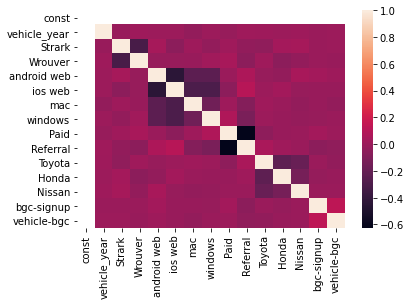

In [192]:
sns.heatmap(X.corr())

In [178]:
model = sm.GLM(y, X , family=sm.families.Binomial(link=sm.families.links.logit())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     first_completed_date   No. Observations:                12659
Model:                              GLM   Df Residuals:                    12644
Model Family:                  Binomial   Df Model:                           14
Link Function:                    logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -5634.8
Date:                  Tue, 01 Jun 2021   Deviance:                       11270.
Time:                          21:14:52   Pearson chi2:                 1.11e+04
No. Iterations:                       6                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -64.9708     11.568     -5.616      0.000     -87.644     -42.298
vehicle_year     0.0329      0.006      5.722      0.000       0.022       0.044
Strark          -0.1236      0.050     -2.484      0.013      -0.221      -0.026
Wrouver         -0.2149      0.091     -2.359      0.018      -0.394      -0.036
android web      0.0800      0.083      0.960      0.337      -0.083       0.243
ios web          0.1440      0.080      1.811      0.070      -0.012       0.300
mac              0.5325      0.093      5.703      0.000       0.350       0.716
windows          0.4687      0.094      5.000      0.000       0.285       0.652
Paid             0.0808      0.066      1.215      0.225      -0.050       0.211
Referral         0.6171      0.061     10.138      0.000       0.498       0.736
Toyota           0.1235      0.058      2.145      0.032       0.011       0.236
Honda            0.0677      0.070      0.965      0.335      -0.070       0.205
Nissan          -0.0259      0.081     -0.321      0.749      -0.184       0.132
bgc-signup      -0.1615      0.004    -37.466      0.000      -0.170      -0.153
vehicle-bgc     -0.1547      0.004    -36.455      0.000      -0.163      -0.146
================================================================================
"""

In [ ]:
X=df.iloc[:,:-1]

In [182]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [183]:
model = sm.GLM(y_train, X_train , family=sm.families.Binomial(link=sm.families.links.logit())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     first_completed_date   No. Observations:                10760
Model:                              GLM   Df Residuals:                    10745
Model Family:                  Binomial   Df Model:                           14
Link Function:                    logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -4794.4
Date:                  Tue, 01 Jun 2021   Deviance:                       9588.9
Time:                          21:26:08   Pearson chi2:                 9.49e+03
No. Iterations:                       6                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -61.7728     12.632     -4.890      0.000     -86.532     -37.014
vehicle_year     0.0313      0.006      4.986      0.000       0.019       0.044
Strark          -0.1117      0.054     -2.072      0.038      -0.217      -0.006
Wrouver         -0.2137      0.098     -2.180      0.029      -0.406      -0.022
android web      0.0776      0.091      0.854      0.393      -0.100       0.256
ios web          0.1450      0.087      1.674      0.094      -0.025       0.315
mac              0.5366      0.101      5.301      0.000       0.338       0.735
windows          0.4672      0.102      4.579      0.000       0.267       0.667
Paid             0.0818      0.072      1.137      0.255      -0.059       0.223
Referral         0.6575      0.066      9.959      0.000       0.528       0.787
Toyota           0.0971      0.062      1.559      0.119      -0.025       0.219
Honda            0.0614      0.076      0.806      0.420      -0.088       0.211
Nissan          -0.0250      0.087     -0.287      0.774      -0.196       0.146
bgc-signup      -0.1609      0.005    -34.445      0.000      -0.170      -0.152
vehicle-bgc     -0.1539      0.005    -33.648      0.000      -0.163      -0.145
================================================================================
"""

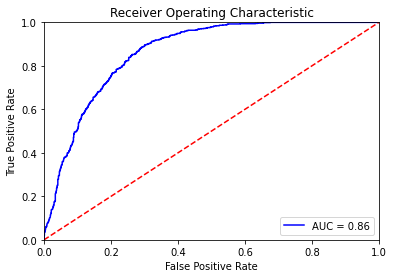

In [184]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred = model.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
df.iloc[:,8].value_counts()[8]

259

In [94]:
df.iloc[:,8].value_counts()[0]/12659

0.054427679911525396

In [145]:
count=0
sum=0
for i in range(3):
    sum+=df.iloc[:,7].value_counts()[i]
print(sum/12659)


0.5035942807488744


In [99]:
y.first_completed_date.value_counts()

False    6890
True     5769
Name: first_completed_date, dtype: int64

3        0.791607
4        0.382345
5        0.217061
6        0.612998
10       0.016124
           ...   
54294    0.097469
54295    0.025456
54297    0.024898
54298    0.370393
54303    0.797450
Length: 12659, dtype: float64

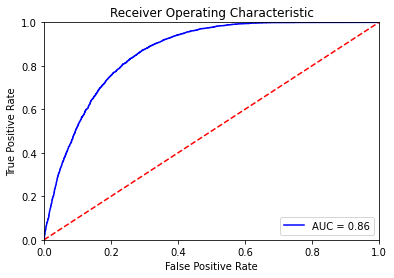

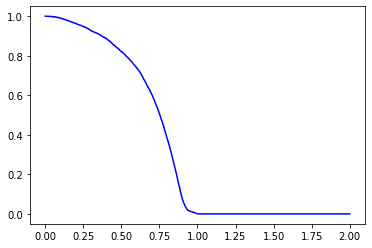

In [149]:
plt.plot(threshold, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

In [26]:
cross2=pd.DataFrame(df.bgc_date.notna(),)
cross2=cross2.join(df.vehicle_added_date.notna())
cross2=pd.DataFrame(df.bgc_date.notna(),)
cross2=cross2.join(df.vehicle_added_date.notna())

In [ ]:
makes=X4[df['vehicle_make'].value_counts().index[0:21]]

In [247]:
df['vehicle_make'].value_counts()

Toyota           3219
Honda            1845
Nissan           1311
Ford              778
Hyundai           677
Chevrolet         665
Kia               584
Volkswagen        503
Dodge             393
Mercedes-Benz     348
Lexus             335
BMW               330
Mazda             292
Subaru            221
Jeep              203
Chrysler          202
Acura             190
Scion             164
Infiniti          147
Audi              144
Mitsubishi        113
GMC                89
Cadillac           86
Lincoln            70
Volvo              57
Buick              46
Pontiac            30
Saturn             30
Land Rover         20
Mini               20
Jaguar             15
Tesla              13
Suzuki             12
Fiat               11
Porsche            10
Mercury             9
Autobot             8
Hummer              7
Saab                7
Bike                6
Bicycle             5
Bentley             2
Maserati            2
Isuzu               2
Walker              1
Oldsmobile

In [472]:
X=df.iloc[:,:-1]

In [473]:
X=df.iloc[:,:-1]
i=pd.get_dummies(df.city_name,drop_first=True)
X=X.join(i)
i=pd.get_dummies(df.signup_os)
X=X.join(i)
i=pd.get_dummies(df.signup_channel,drop_first=True)
X=X.join(i)

In [241]:
X2=X
X2=X2.loc[X2.vehicle_added_date.dropna().index]
X3=X2.loc[X2.bgc_date.dropna().index]
X4=X3.loc[X3.city_name.dropna().index]
for i in X4.index:
        days=np.datetime64(parser.parse(X4.bgc_date[i]).date())-np.datetime64(parser.parse(X4.signup_date[i]).date())
        days=days.astype(int)
        X4.loc[i,'bgc-signup']=days
for i in X4.index:
        days=np.datetime64(parser.parse(X4.vehicle_added_date[i]).date())-np.datetime64(parser.parse(X4.bgc_date[i]).date())
        days=days.astype(int)


In [242]:
X5=X4.join(makes)

In [245]:
X5=X5.drop(['id','city_name','signup_channel','signup_date','other'	,'bgc_date','vehicle_added_date','vehicle_make','vehicle_model','signup_os'],axis=1)

In [276]:
X5_index=X5.index
for i in X5_index:
    if X5.loc[i,'vehicle-bgc']<0:
        X5=X5.drop(i)
y_x5=pd.DataFrame(df.first_completed_date.notna())
y=y_x5.loc[X5.index]

In [317]:
X5

,vehicle_year,Strark,Wrouver,android web,ios web,mac,windows,Paid,Referral,bgc-signup,...,BMW,Mazda,Subaru,Jeep,Chrysler,Acura,Scion,Infiniti,Audi,Mitsubishi
3,2016.0,0,0,1,0,0,0,0,1,5.0,...,0,0,0,0,0,0,0,0,0,0
4,2016.0,1,0,1,0,0,0,0,1,15.0,...,0,0,0,0,0,0,0,0,0,0
5,2006.0,1,0,1,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
6,2014.0,1,0,0,1,0,0,1,0,2.0,...,0,0,0,0,0,0,0,0,0,0
10,2015.0,1,0,0,1,0,0,0,1,22.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,2006.0,0,0,1,0,0,0,0,1,19.0,...,0,0,0,0,0,0,0,0,0,0
54295,2016.0,1,0,1,0,0,0,0,1,13.0,...,0,0,0,0,0,0,0,0,0,0
54297,2012.0,1,0,1,0,0,0,0,0,10.0,...,0,0,0,0,0,0,0,0,0,0
54298,2015.0,0,0,0,0,1,0,0,1,7.0,...,0,0,0,0,0,0,0,0,0,0


In [391]:
X, y =sm.add_constant(X5), y

In [392]:
scaler_x.fit(X)

X = scaler_x.transform(X)

In [291]:
from sklearn.linear_model import LogisticRegressionCV

In [406]:
clf = LogisticRegressionCV(Cs=50,cv=10,penalty='l1' ,scoring='accuracy',random_state=0,solver= 'liblinear').fit(X, y)

In [410]:
clf.score

<bound method LogisticRegressionCV.score of LogisticRegressionCV(Cs=50, cv=10, penalty='l1', random_state=0,
                     scoring='roc_auc', solver='liblinear')>

In [414]:
y_pred = clf.predict(X)
metrics.recall_score(y,y_pred)

0.8202461431790605

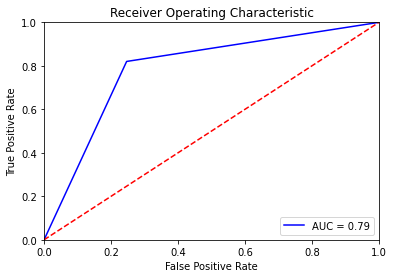

In [411]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred = clf.predict(X)
fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [349]:
coef=pd.DataFrame({'coef':clf.coef_[0][1:-1]})

<AxesSubplot:>

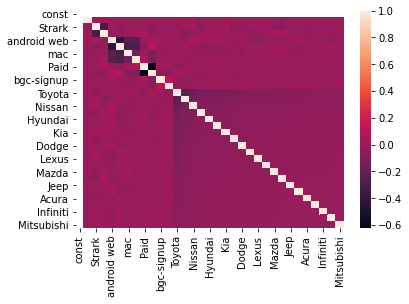

In [362]:
sns.heatmap(X.corr())

In [356]:
i=pd.DataFrame({'feature':X5.count()})

In [358]:
result=coef.join(i)

In [359]:
result

,coef,feature
0,0.780792,vehicle_year
1,-0.056275,Strark
2,-0.045516,Wrouver
3,0.008734,android web
4,0.040615,ios web
5,0.157770,mac
6,0.136721,windows
7,0.024165,Paid
8,0.297749,Referral
9,-1.506924,bgc-signup


In [277]:
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)


In [417]:
X2=X
X3=X2.loc[X2.bgc_date.dropna().index]
X4=X3.loc[X3.city_name.dropna().index]
for i in X4.index:
        days=np.datetime64(parser.parse(X4.bgc_date[i]).date())-np.datetime64(parser.parse(X4.signup_date[i]).date())
        days=days.astype(int)
        X4.loc[i,'bgc-signup']=days


In [421]:
y=pd.DataFrame(X4.vehicle_added_date.notna())

In [425]:
X5=X4.drop(['vehicle_year','id','city_name','signup_channel','signup_date','other'	,'bgc_date','vehicle_added_date','vehicle_make','vehicle_model','signup_os'],axis=1)

In [428]:
X, y =sm.add_constant(X5), y

In [430]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [431]:
model = sm.GLM(y_train, X_train , family=sm.families.Binomial(link=sm.families.links.logit())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     vehicle_added_date   No. Observations:                27961
Model:                            GLM   Df Residuals:                    27951
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17496.
Date:                Wed, 02 Jun 2021   Deviance:                       34992.
Time:                        09:39:52   Pearson chi2:                 2.82e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6745      0.047    -14.442      0.000      -0.766      -0.583
Strark          0.0099      0.027      0.362      0.717      -0.044       0.063
Wrouver         0.0169      0.050      0.340      0.734      -0.080       0.114
android web     0.1425      0.044      3.263      0.001       0.057       0.228
ios web         0.4002      0.042      9.478      0.000       0.317       0.483
mac             0.6090      0.051     11.921      0.000       0.509       0.709
windows         0.4324      0.050      8.610      0.000       0.334       0.531
Paid           -0.2181      0.034     -6.433      0.000      -0.285      -0.152
Referral        0.8413      0.033     25.501      0.000       0.777       0.906
bgc-signup     -0.0348      0.001    -26.051      0.000      -0.037      -0.032
===============================================================================
"""

In [468]:
X, y =X5, y

In [469]:
X

,Strark,Wrouver,android web,ios web,mac,windows,Paid,Referral,bgc-signup
2,0,1,0,0,0,1,0,0,0.0
3,0,0,1,0,0,0,0,1,5.0
4,1,0,1,0,0,0,0,1,15.0
5,1,0,1,0,0,0,0,1,0.0
6,1,0,0,1,0,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...
54638,1,0,1,0,0,0,0,1,27.0
54661,1,0,1,0,0,0,0,0,6.0
54665,0,0,0,0,0,0,0,0,7.0
54673,0,0,0,0,0,1,1,0,1.0


In [435]:
scaler_x.fit(X)

X = scaler_x.transform(X)

In [460]:
clf = LogisticRegressionCV(Cs=100,cv=10,penalty='l1' ,scoring='recall',random_state=0,solver= 'liblinear').fit(X, y)


In [463]:
clf.coef_

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10591848, 0.        ]])

In [471]:
coef=pd.DataFrame({'coef':clf.coef_[0]})
i=pd.DataFrame({'feature':X5.count().index})
result=coef.join(i)
result

,coef,feature
0,0.000000,Strark
1,0.000000,Wrouver
2,0.000000,android web
3,0.000000,ios web
4,0.000000,mac
5,0.000000,windows
6,0.000000,Paid
7,0.105918,Referral
8,0.000000,bgc-signup


In [464]:
y_pred = clf.predict(X)
metrics.recall_score(y,y_pred)

0.5024458420684835

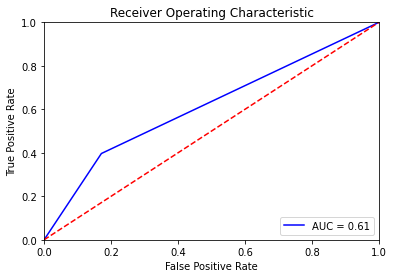

In [456]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred = clf.predict(X)
fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [483]:
X=df.iloc[:,:-1]
i=pd.get_dummies(df.city_name,drop_first=True)
X=X.join(i)
i=pd.get_dummies(df.signup_os)
X=X.join(i)
i=pd.get_dummies(df.signup_channel,drop_first=True)
X=X.join(i)

In [484]:
X2=X
X4=X2.loc[X2.city_name.dropna().index]
X4=X4.loc[X4.signup_os.dropna().index]

In [485]:
X5=X4.drop(['vehicle_year','id','city_name','signup_channel','signup_date','other'	,'bgc_date','vehicle_added_date','vehicle_make','vehicle_model','signup_os'],axis=1)

In [486]:
y=pd.DataFrame(X4.bgc_date.notna())

In [487]:
X, y =sm.add_constant(X5), y

In [488]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [489]:
model = sm.GLM(y_train, X_train , family=sm.families.Binomial(link=sm.families.links.logit())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               bgc_date   No. Observations:                40650
Model:                            GLM   Df Residuals:                    40641
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24589.
Date:                Wed, 02 Jun 2021   Deviance:                       49179.
Time:                        11:31:02   Pearson chi2:                 4.07e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9263      0.046     20.195      0.000       0.836       1.016
Strark          0.0745      0.023      3.200      0.001       0.029       0.120
Wrouver        -0.2998      0.038     -7.949      0.000      -0.374      -0.226
android web    -0.2641      0.044     -6.037      0.000      -0.350      -0.178
ios web        -0.2073      0.043     -4.773      0.000      -0.292      -0.122
mac            -0.0249      0.050     -0.495      0.621      -0.124       0.074
windows        -0.0459      0.048     -0.946      0.344      -0.141       0.049
Paid           -0.6922      0.027    -26.058      0.000      -0.744      -0.640
Referral        0.8924      0.034     25.936      0.000       0.825       0.960
===============================================================================
"""

In [491]:
X=X5
scaler_x.fit(X)

X = scaler_x.transform(X)

In [499]:
clf = LogisticRegressionCV(Cs=300,cv=10,penalty='l1' ,scoring='roc_auc',random_state=0,solver= 'liblinear').fit(X, y)


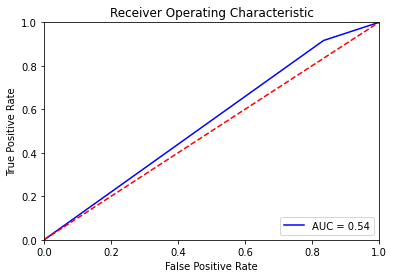

In [500]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred = clf.predict(X)
fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [504]:
coef=pd.DataFrame({'coef':clf.coef_[0]})
i=pd.DataFrame({'feature':X5.count().index})
result=coef.join(i)
result

,coef,feature
0,0.036242,Strark
1,-0.085314,Wrouver
2,-0.112912,android web
3,-0.095898,ios web
4,-0.004749,mac
5,-0.010209,windows
6,-0.347040,Paid
7,0.389417,Referral


In [502]:
y_pred = clf.predict(X)
metrics.recall_score(y,y_pred)

0.9165802773098354

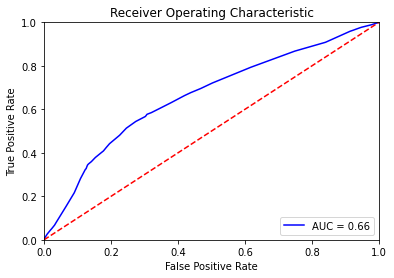

In [490]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred = model.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

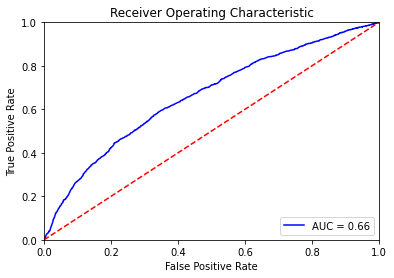

In [432]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred = model.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
c=pd.DataFrame({'past_days':past_days,'y':y})

In [55]:
a=c.corr(method='pearson')

In [56]:
a

,past_days,y
past_days,1.000000,-0.308949
y,-0.308949,1.000000


<BarContainer object of 5 artists>

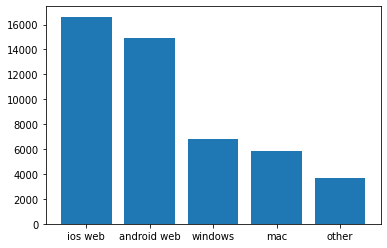

In [26]:
plt.bar(df.signup_os.value_counts().index,df.signup_os.value_counts())

<BarContainer object of 3 artists>

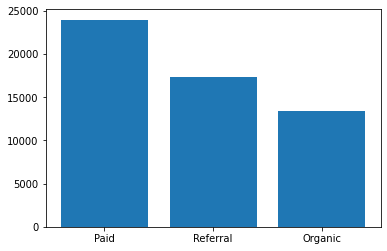

In [5]:
plt.bar(df.signup_channel.value_counts().index,df.signup_channel.value_counts())